# EDA and Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Missing value

### Dropping missing values

In [2]:
np.nan

nan

In [3]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [4]:
dic = {"name":name,"math":math,"science":science}

In [5]:
df = pd.DataFrame(dic)

In [6]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [7]:
df.isnull()

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [8]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [9]:
df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [10]:
df.dropna(axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [11]:
df.dropna(thresh=2)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
4,kevin,85.0,76.0


In [12]:
df.dropna(subset=["name","math"])

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
4,kevin,85.0,76.0


In [13]:
# Drop by choice
df.drop(3)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
4,kevin,85.0,76.0


In [14]:
df.drop([1,3])

,name,math,science
0,john,89.0,78.0
2,jill,67.0,NaN
4,kevin,85.0,76.0


In [15]:
df.drop(["name","math"],axis=1)

,science
0,78.0
1,75.0
2,NaN
3,NaN
4,76.0


### Replacing missing values

In [16]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [17]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [18]:
df.fillna(method="ffill")

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,75.0
3,kenny,67.0,75.0
4,kevin,85.0,76.0


In [19]:
math_mean = df["math"].mean()
science_mean = df["science"].mean()
print(math_mean)
print(science_mean)

79.75
76.33333333333333


In [20]:
df["math"].fillna(math_mean,inplace=True)

In [21]:
df["science"].fillna(science_mean,inplace=True)

In [22]:
df

,name,math,science
0,john,89.00,78.000000
1,jack,78.00,75.000000
2,jill,67.00,76.333333
3,kenny,79.75,76.333333
4,kevin,85.00,76.000000


In [23]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,"?",85]
science = [78,75,45,56,76]

dic = {"name":name,"math":math,"science":science}

In [24]:
df = pd.DataFrame(dic)

In [25]:
df

,name,math,science
0,john,89,78
1,jack,78,75
2,jill,67,45
3,kenny,?,56
4,kevin,85,76


In [26]:
df.isnull().sum()

name       0
math       0
science    0
dtype: int64

In [27]:
df.replace("?",math_mean,inplace=True)

In [28]:
df

,name,math,science
0,john,89.00,78
1,jack,78.00,75
2,jill,67.00,45
3,kenny,79.75,56
4,kevin,85.00,76


#### House price dataset

In [29]:
house = pd.read_csv("house_price.csv")

In [30]:
house.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,GarageArea,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,1Fam,2Story,7,5,2003,2003,Gable,548,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,1Fam,1Story,6,8,1976,1976,Gable,460,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,1Fam,2Story,7,5,2001,2002,Gable,608,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,1Fam,2Story,7,5,1915,1970,Gable,642,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,1Fam,2Story,8,5,2000,2000,Gable,836,Normal,250000


In [31]:
house.tail()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,GarageArea,SaleCondition,SalePrice
1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,1Fam,2Story,6,5,1999,2000,Gable,460,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,1Fam,1Story,6,6,1978,1988,Gable,500,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,1Fam,2Story,7,9,1941,2006,Gable,252,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,1Fam,1Story,5,6,1950,1996,Hip,240,Normal,142125
1459,1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,...,1Fam,1Story,5,6,1965,1965,Gable,276,Normal,147500


In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
Unnamed: 0       1460 non-null int64
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
GarageArea       1460 non-nu

In [33]:
house.set_index("Id",inplace=True)

In [34]:
house.isnull().sum()

Unnamed: 0          0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
GarageArea          0
SaleCondition       0
SalePrice           0
dtype: int64

In [35]:
house.drop(["Alley"],axis=1,inplace=True)

In [36]:
lot_mean = house["LotFrontage"].mean()

In [37]:
house["LotFrontage"].fillna(lot_mean,inplace=True)

In [38]:
house.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
GarageArea       0
SaleCondition    0
SalePrice        0
dtype: int64

## 2) Skewness

In [39]:
house.describe()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,472.980137,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,213.804841,79442.502883
min,0.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,34900.000000
25%,364.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,334.500000,129975.000000
50%,729.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,480.000000,163000.000000
75%,1094.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,576.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1418.000000,755000.000000


In [40]:
from scipy.stats import skew

In [41]:
# Changing data type to string
house[["OverallQual","OverallCond"]] = house[["OverallQual","OverallCond"]].astype(str)

In [42]:
# Selecting only numerical columns
house_num = house.select_dtypes(["int64","float64"])

In [43]:
house_num.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageArea,SalePrice
Id,,,,,,,,
1,0,60,65.0,8450,2003,2003,548,208500
2,1,20,80.0,9600,1976,1976,460,181500
3,2,60,68.0,11250,2001,2002,608,223500
4,3,70,60.0,9550,1915,1970,642,140000
5,4,60,84.0,14260,2000,2000,836,250000


In [44]:
house_num.drop(["Unnamed: 0"],axis=1,inplace=True)

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
house_num.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageArea,SalePrice
Id,,,,,,,
1,60,65.0,8450,2003,2003,548,208500
2,20,80.0,9600,1976,1976,460,181500
3,60,68.0,11250,2001,2002,608,223500
4,70,60.0,9550,1915,1970,642,140000
5,60,84.0,14260,2000,2000,836,250000


In [46]:
house_num.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageArea,SalePrice
Id,,,,,,,
1,60,65.0,8450,2003,2003,548,208500
2,20,80.0,9600,1976,1976,460,181500
3,60,68.0,11250,2001,2002,608,223500
4,70,60.0,9550,1915,1970,642,140000
5,60,84.0,14260,2000,2000,836,250000


In [47]:
skew(house_num["MSSubClass"])

1.4062101115313512

In [48]:
for col in house_num:
    print(col, skew(house_num[col]))

MSSubClass 1.4062101115313512
LotFrontage 2.382499177054863
LotArea 12.195142125084478
YearBuilt -0.612830724202899
YearRemodAdd -0.5030444967597948
GarageArea 0.1797959420587727
SalePrice 1.880940746034036


MSSubClass 1.4062101115313512


C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


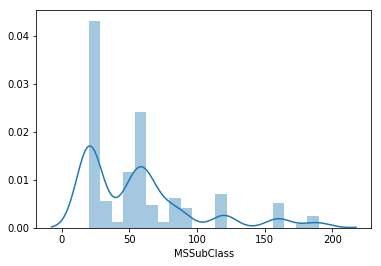

LotFrontage 2.382499177054863


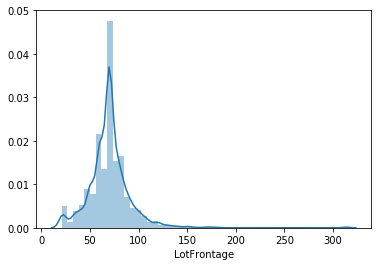

LotArea 12.195142125084478


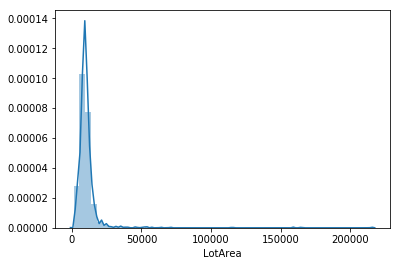

YearBuilt -0.612830724202899


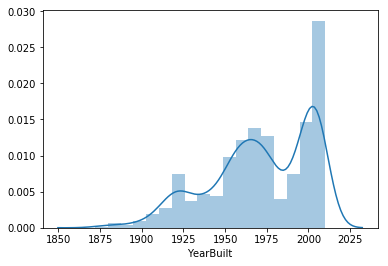

YearRemodAdd -0.5030444967597948


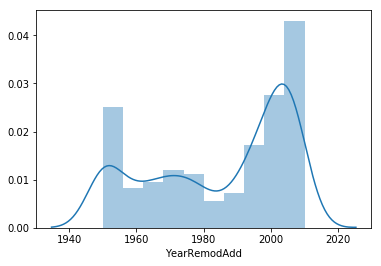

GarageArea 0.1797959420587727


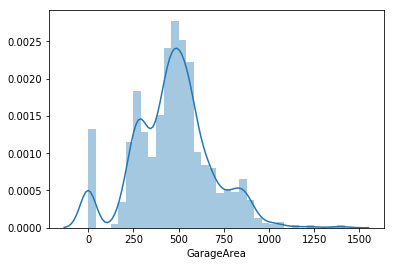

SalePrice 1.880940746034036


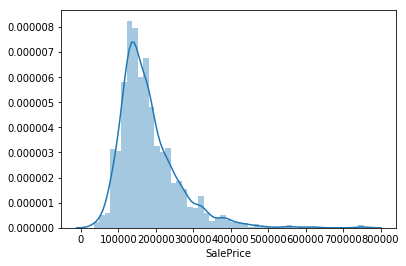

In [49]:
for col in house_num:
    print(col, skew(house_num[col]))
    plt.figure()
    sns.distplot(house_num[col])
    plt.show()

In [50]:
for col in house_num:
    if skew(house_num[col]) >= 1 or skew(house_num[col]) <= -1:
        house_num[col] = np.sqrt(house_num[col])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
for col in house_num:
    print(col, skew(house_num[col]))

MSSubClass 0.7616639725925549
LotFrontage 0.3678334711730094
LotArea 4.135459203556218
YearBuilt -0.612830724202899
YearRemodAdd -0.5030444967597948
GarageArea 0.1797959420587727
SalePrice 0.9421834681211159


## 3) Removing outliers

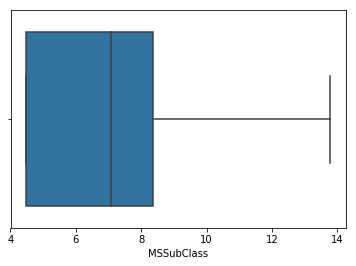

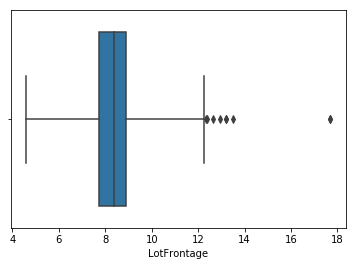

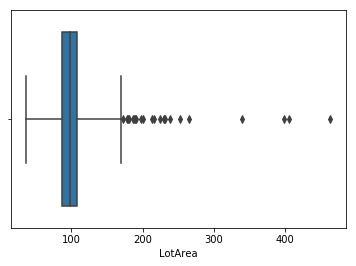

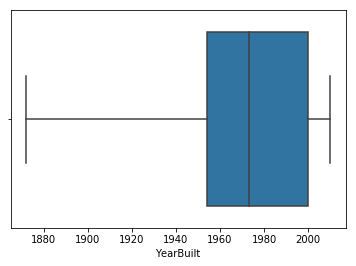

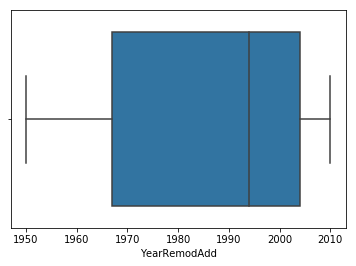

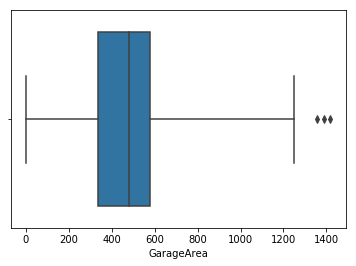

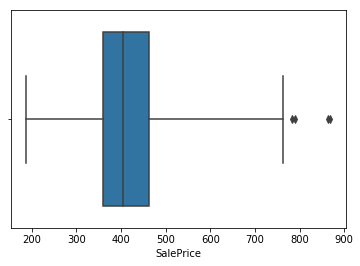

In [52]:
for col in house_num:
    plt.figure()
    sns.boxplot(data=house_num,x=col,whis=3)
    plt.show()

In [53]:
q1 = np.quantile(house_num["GarageArea"],0.25)
q3 = np.quantile(house_num["GarageArea"],0.75)

iqr = q3-q1
print(iqr)

241.5


In [54]:
upper_whisker = q3 + 3*iqr
print(upper_whisker)

1300.5


In [55]:
house_num = house_num[house_num["GarageArea"] <= 1300]

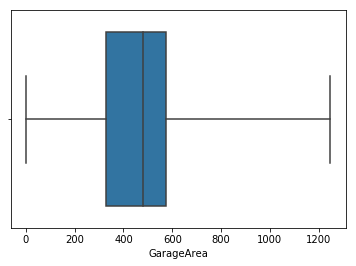

In [56]:
plt.figure()
sns.boxplot(data=house_num,x="GarageArea",whis=3)
plt.show()

## 4) Handling categorical data 

In [57]:
house_cat = house.select_dtypes("object")

In [58]:
house_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,SaleCondition
Id,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,Normal


In [59]:
house_cat["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### One hot encoding

In [60]:
pd.get_dummies(house_cat["MSZoning"]).head()

,C (all),FV,RH,RL,RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0


### Label encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
for col in house_cat:
    le = LabelEncoder()
    house_cat[col] = le.fit_transform(house_cat[col])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
house_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,SaleCondition
Id,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,0,5,7,4,1,4
2,3,1,3,3,0,2,0,24,1,2,0,2,6,7,1,4
3,3,1,0,3,0,4,0,5,2,2,0,5,7,4,1,4
4,3,1,0,3,0,0,0,6,2,2,0,5,7,4,1,0
5,3,1,0,3,0,2,0,15,2,2,0,5,8,4,1,4


### Merging continous and categorical dataframe

In [66]:
house_new = pd.merge(house_num,house_cat,on="Id")

In [67]:
house_new.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageArea,SalePrice,MSZoning,Street,LotShape,...,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,7.745967,8.062258,91.923882,2003,2003,548,456.618002,3,1,3,...,0,5,2,2,0,5,7,4,1,4
2,4.472136,8.944272,97.979590,1976,1976,460,426.028168,3,1,3,...,0,24,1,2,0,2,6,7,1,4
3,7.745967,8.246211,106.066017,2001,2002,608,472.757866,3,1,0,...,0,5,2,2,0,5,7,4,1,4
4,8.366600,7.745967,97.724101,1915,1970,642,374.165739,3,1,0,...,0,6,2,2,0,5,7,4,1,0
5,7.745967,9.165151,119.415242,2000,2000,836,500.000000,3,1,0,...,0,15,2,2,0,5,8,4,1,4


In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [70]:
for col in house_new:
    mm = MinMaxScaler()
    house_new[col] = mm.fit_transform(house_new[[col]])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were

In [71]:
house_new.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageArea,SalePrice,MSZoning,Street,LotShape,...,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0.351574,0.265438,0.130567,0.949275,0.883333,0.439103,0.395552,0.75,1.0,1.0,...,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.8
2,0.000000,0.332719,0.144720,0.753623,0.433333,0.368590,0.350705,0.75,1.0,1.0,...,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.666667,0.875,0.2,0.8
3,0.351574,0.279470,0.163618,0.934783,0.866667,0.487179,0.419214,0.75,1.0,0.0,...,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.8
4,0.418224,0.241310,0.144123,0.311594,0.333333,0.514423,0.274670,0.75,1.0,0.0,...,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.0
5,0.351574,0.349569,0.194816,0.927536,0.833333,0.669872,0.459153,0.75,1.0,0.0,...,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.888889,0.500,0.2,0.8


### Feature Engineering

In [74]:
house_new["TotalArea"] = house_new["LotArea"] + house_new["GarageArea"]

In [75]:
house_new.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageArea,SalePrice,MSZoning,Street,LotShape,...,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,SaleCondition,TotalArea
Id,,,,,,,,,,,,,,,,,,,,,
1,0.351574,0.265438,0.130567,0.949275,0.883333,0.439103,0.395552,0.75,1.0,1.0,...,0.208333,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.8,0.569670
2,0.000000,0.332719,0.144720,0.753623,0.433333,0.368590,0.350705,0.75,1.0,1.0,...,1.000000,0.125,0.285714,0.0,0.285714,0.666667,0.875,0.2,0.8,0.513310
3,0.351574,0.279470,0.163618,0.934783,0.866667,0.487179,0.419214,0.75,1.0,0.0,...,0.208333,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.8,0.650798
4,0.418224,0.241310,0.144123,0.311594,0.333333,0.514423,0.274670,0.75,1.0,0.0,...,0.250000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.2,0.0,0.658546
5,0.351574,0.349569,0.194816,0.927536,0.833333,0.669872,0.459153,0.75,1.0,0.0,...,0.625000,0.250,0.285714,0.0,0.714286,0.888889,0.500,0.2,0.8,0.864688
